In [6]:
# Creates plots of phase behavior seen in the synthetic (biophysical model) data; 
# Multiple 2D slices are made first, and later a 3D plot

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from random import sample
import sklearn
import random
from math import ceil

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

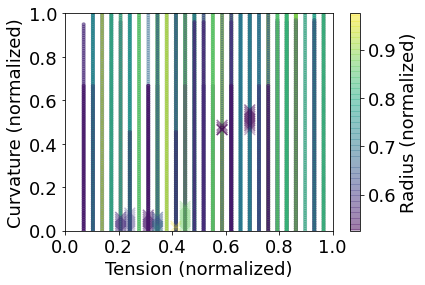

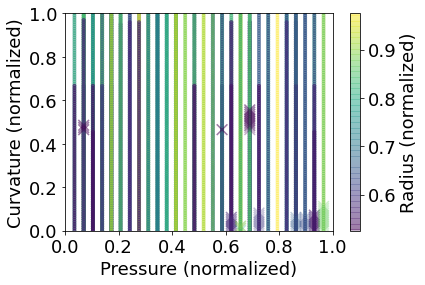

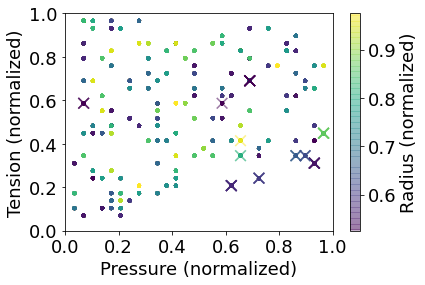

In [20]:
# Import datasets and ensure that all non-omega instances are classed as a 0
df = pd.read_csv('run_data_pressure.csv')
df.rename(columns={"pressure_dim_id": "pressure_dim", "pressure_dim": "pressure_dim_id"}, inplace = True) # This is to correct for an error in the ascent/descent script
df.loc[df.omega == -1, 'omega'] = 0

df_sub = df
# Code to normalize features between 0 and 1
df_sub.C0 = (df.C0*-1 - min(df.C0*-1))/(max(df.C0*-1) - min(df.C0*-1))
df_sub.lam_dim = (df.lam_dim - min(df.lam_dim))/(max(df.lam_dim) - min(df.lam_dim))
df_sub.rad = (df.rad - min(df.rad))/(max(df.rad) - min(df.rad))
df_sub.pressure_dim = (df.pressure_dim - min(df.pressure_dim))/(max(df.pressure_dim) - min(df.pressure_dim))

# Code to subset the data based on radius
upper_range_rad = 1
lower_range_rad = .5

df_sub = df.where(df.rad > lower_range_rad)
df_sub = df_sub.where(df_sub.rad < upper_range_rad) 
df_sub = df_sub.dropna(how = 'all').reset_index(drop = 'True')

# Code to subset the data based on pressure
upper_range_pressure = 1
lower_range_pressure = 0

df_sub = df_sub.where(df_sub.pressure_dim > lower_range_pressure)
df_sub = df_sub.where(df_sub.pressure_dim < upper_range_pressure) 
df_sub = df_sub.dropna(how = 'all').reset_index(drop = 'True')

# Code to subset the data based on tension
upper_range_tension = 1
lower_range_tension = 0

df_sub = df_sub.where(df_sub.lam_dim > lower_range_tension)
df_sub = df_sub.where(df_sub.lam_dim < upper_range_tension) 
df_sub = df_sub.dropna(how = 'all').reset_index(drop = 'True')



param_ids = set(df_sub.Param_id)
test_num = ceil(.25*(len(param_ids)))
test_ids = set(sample(param_ids, test_num))
train_ids = param_ids - test_ids

train = df_sub[df_sub.Param_id.isin(train_ids)] # df_sub.iloc[0:ceil(len(df_sub)*.75)]# pd.read_csv('train.csv')
validation = df_sub[df_sub.Param_id.isin(test_ids)] # df_sub.iloc[ceil(len(df_sub)*.75):] # pd.read_csv('validation.csv')

cm = plt.cm.get_cmap('RdYlBu')
Curv_ten_rad = plt.scatter(df_sub.lam_dim, 1*df_sub.C0, c = df_sub.rad, marker = '.', alpha = .3)
omegas = df_sub.where(df_sub.omega == 1).dropna(how = 'all')
plt.scatter(omegas.lam_dim, 1*omegas.C0, c = omegas.rad, marker = 'x', s = 20*(4**1.25), alpha = .3)
cbar = plt.colorbar(Curv_ten_rad)
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()

cbar.set_label('Radius (normalized)')
plt.xlabel('Tension (normalized)')
plt.ylabel('Curvature (normalized)')
plt.xlim(-0.001, 1)
plt.ylim(-0.001, 1)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=6)
#plt.show()
plt.savefig('R2_Helfrich_Train_TCR_R3.png', bbox_inches="tight")
plt.savefig('R2_Helfrich_Train_TCR_R3.pdf', bbox_inches="tight")
plt.show()






cm = plt.cm.get_cmap('RdYlBu')
Curv_ten_rad = plt.scatter(df_sub.pressure_dim, 1*df_sub.C0, c = df_sub.rad, marker = '.', alpha = .3)
omegas = df_sub.where(df_sub.omega == 1).dropna(how = 'all')
#plt.scatter(omegas.pressure_dim, 1*omegas.C0, c = 'black', marker = 'x', alpha = .3)
plt.scatter(omegas.pressure_dim, 1*omegas.C0, c = omegas.rad, marker = 'x', s = 20*(4**1.25), alpha = .3)
cbar = plt.colorbar(Curv_ten_rad)
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()

cbar.set_label('Radius (normalized)')
plt.xlabel('Pressure (normalized)')
plt.ylabel('Curvature (normalized)')
plt.xlim(-0.001, 1)
plt.ylim(-0.001, 1)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=6)
plt.savefig('R2_Helfrich_Train_PCR_R3.png', bbox_inches="tight")
plt.savefig('R2_Helfrich_Train_PCR_R3.pdf', bbox_inches="tight")
plt.show()





cm = plt.cm.get_cmap('RdYlBu')
Curv_ten_rad = plt.scatter(df_sub.pressure_dim, df_sub.lam_dim, c = df_sub.rad, marker = '.', alpha = .3)
omegas = df_sub.where(df_sub.omega == 1).dropna(how = 'all')
plt.scatter(omegas.pressure_dim, 1*omegas.lam_dim, c = omegas.rad, marker = 'x', s = 20*(4**1.25), alpha = .3)
cbar = plt.colorbar(Curv_ten_rad)
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()

cbar.set_label('Radius (normalized)')
plt.xlabel('Pressure (normalized)')
plt.ylabel('Tension (normalized)')
plt.xlim(-0.001, 1)
plt.ylim(-0.001, 1)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=6)
#plt.show()
plt.savefig('R2_Helfrich_Train_PTR_R3.png', bbox_inches="tight")
plt.savefig('R2_Helfrich_Train_PTR_R3.pdf', bbox_inches="tight")

In [40]:
# I just redid the imports since we don't want the large 3D Scatterplot to be a subset of the available data

df = pd.read_csv('run_data_pressure.csv')
df.rename(columns={"pressure_dim_id": "pressure_dim", "pressure_dim": "pressure_dim_id"}, inplace = True) # This is to correct for an error in the ascent/descent script
df.loc[df.omega == -1, 'omega'] = 0
df_sub = df

df_sub.C0 = (df.C0*-1 - min(df.C0*-1))/(max(df.C0*-1) - min(df.C0*-1))
df_sub.lam_dim = (df.lam_dim - min(df.lam_dim))/(max(df.lam_dim) - min(df.lam_dim))
df_sub.rad = (df.rad - min(df.rad))/(max(df.rad) - min(df.rad))
df_sub.pressure_dim = (df.pressure_dim - min(df.pressure_dim))/(max(df.pressure_dim) - min(df.pressure_dim))


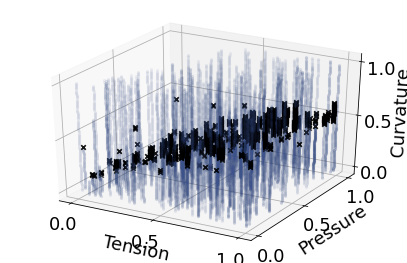

In [42]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in df_sub.index:
    x = df_sub.iloc[i].lam_dim 
    y = df_sub.iloc[i].pressure_dim 
    z = 1*df_sub.iloc[i].C0 
    col = df_sub.iloc[i].rad
    if df_sub.iloc[i].omega == 1:
        m = 'x'
        col = 'black'
        alph = .7
    else:
        m = '.'
        col = "#3b528b"
        alph = .05
    ax.scatter(x, y, z, marker=m, c = col, alpha = alph)

ax.set_xlabel('Tension')
ax.set_ylabel('Pressure')
ax.set_zlabel('Curvature')
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_zticks([0, 0.5, 1])
plt.tight_layout()
plt.savefig('3D_Pressure.png')
plt.savefig('3D_Pressure.pdf')
plt.show()